In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.patches as patches


In [2]:
%cd OneDrive\Documents\hydro\Updated_Exercises_March_2015\Exercise 4

def tokenizer(fname):
    with open(fname) as f:
        chunk = []
        for line in f:
            if 'HEAD'in line:
                continue
            if 'END' in line:
                yield chunk
                chunk = []
                continue
            chunk.append(line)


arrays = [np.loadtxt(A) for A in tokenizer('u.dat')]

[WinError 3] The system cannot find the path specified: 'OneDrive\\Documents\\hydro\\Updated_Exercises_March_2015\\Exercise 4'
C:\Users\balin\OneDrive\Documents\hydro\Updated_Exercises_March_2015\Exercise 4


In [82]:
def readVariables(src):
    u = np.loadtxt('%s/u.dat' %src)
    w = np.loadtxt('%s/w.dat' %src)
    rho  = np.loadtxt('%s/rho.dat' %src)
    q = np.loadtxt('%s/q.dat' %src)
    return {'u': u,'w': w, 'rho':  rho, 'q':q}

In [4]:
def get_ith_iteration(i, variables, width = 201, length = 26):
    d = {}
    for key in variables.keys():
        d[key] = variables[key][i*length : (i+1)*length , :]
    return d


In [5]:
dictionary = readVariables()

In [15]:
null = get_ith_iteration(0, dictionary)

In [4]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

    
def plotVariables(variables, save=None, every = 5, width = 201, length = 26):
    plt.clf() 
    x = np.linspace(0, 2.25, width)
    y = np.linspace(0, -0.25, length)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(2,1,1, adjustable='box')
    ax2 = fig.add_subplot(2,1,2, adjustable = 'box')

    im = ax1.contourf(X, Y, variables['rho']+1028., alpha=0.5, cmap=cm.viridis)  
    #ax1.quiver(X[::every, ::every], Y[::every, ::every], variables['u'][::every, ::every], variables['w'][::every, ::every])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    fig.colorbar(im, ax=ax1)
    dt = 0.01
    time = i*(0.3/dt)
    ax1.set_title('Density, t = {:d} min'.format(time))
    
    im2 = ax2.contourf(X, Y, variables['q']*1028.*9.81, alpha=0.5, cmap=cm.viridis)  
    ax2.quiver(X[::every, ::every], Y[::every, ::every], variables['u'][::every, ::every], variables['w'][::every, ::every])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    #forceAspect(ax1,aspect=1./8.)
    #forceAspect(ax2,aspect=1./8.)
    ratio = 0.125
    #for ax in [ax1, ax2]:
    #    xmin, xmax = ax.get_xlim()
    #    ymin, ymax = ax.get_ylim()
    #    ax.set_aspect(abs((xmax-xmin)/(ymax-ymin))*ratio, adjustable='box-forced')

    fig.colorbar(im2, ax=ax2)
    ax2.set_title('Pressure anomaly')
    fig.tight_layout()
    
    if(save):
        plt.savefig(save)
    plt.close()
    

In [5]:
dictionary = readVariables()


In [4]:
for i in range(800):
    
    iteration = get_ith_iteration(i, dictionary)
    plotVariables(iteration, 'pics/'+'{0:03d}'.format(i)+'.png')


NameError: name 'get_ith_iteration' is not defined

In [10]:
d = [3,4,5,6,7, 10, 13, 15,18,20, 21,24, 27, 30, 33, 36, 39, 45]
len(d)

18

In [11]:
dt = 0.01
3600*dt

36.0

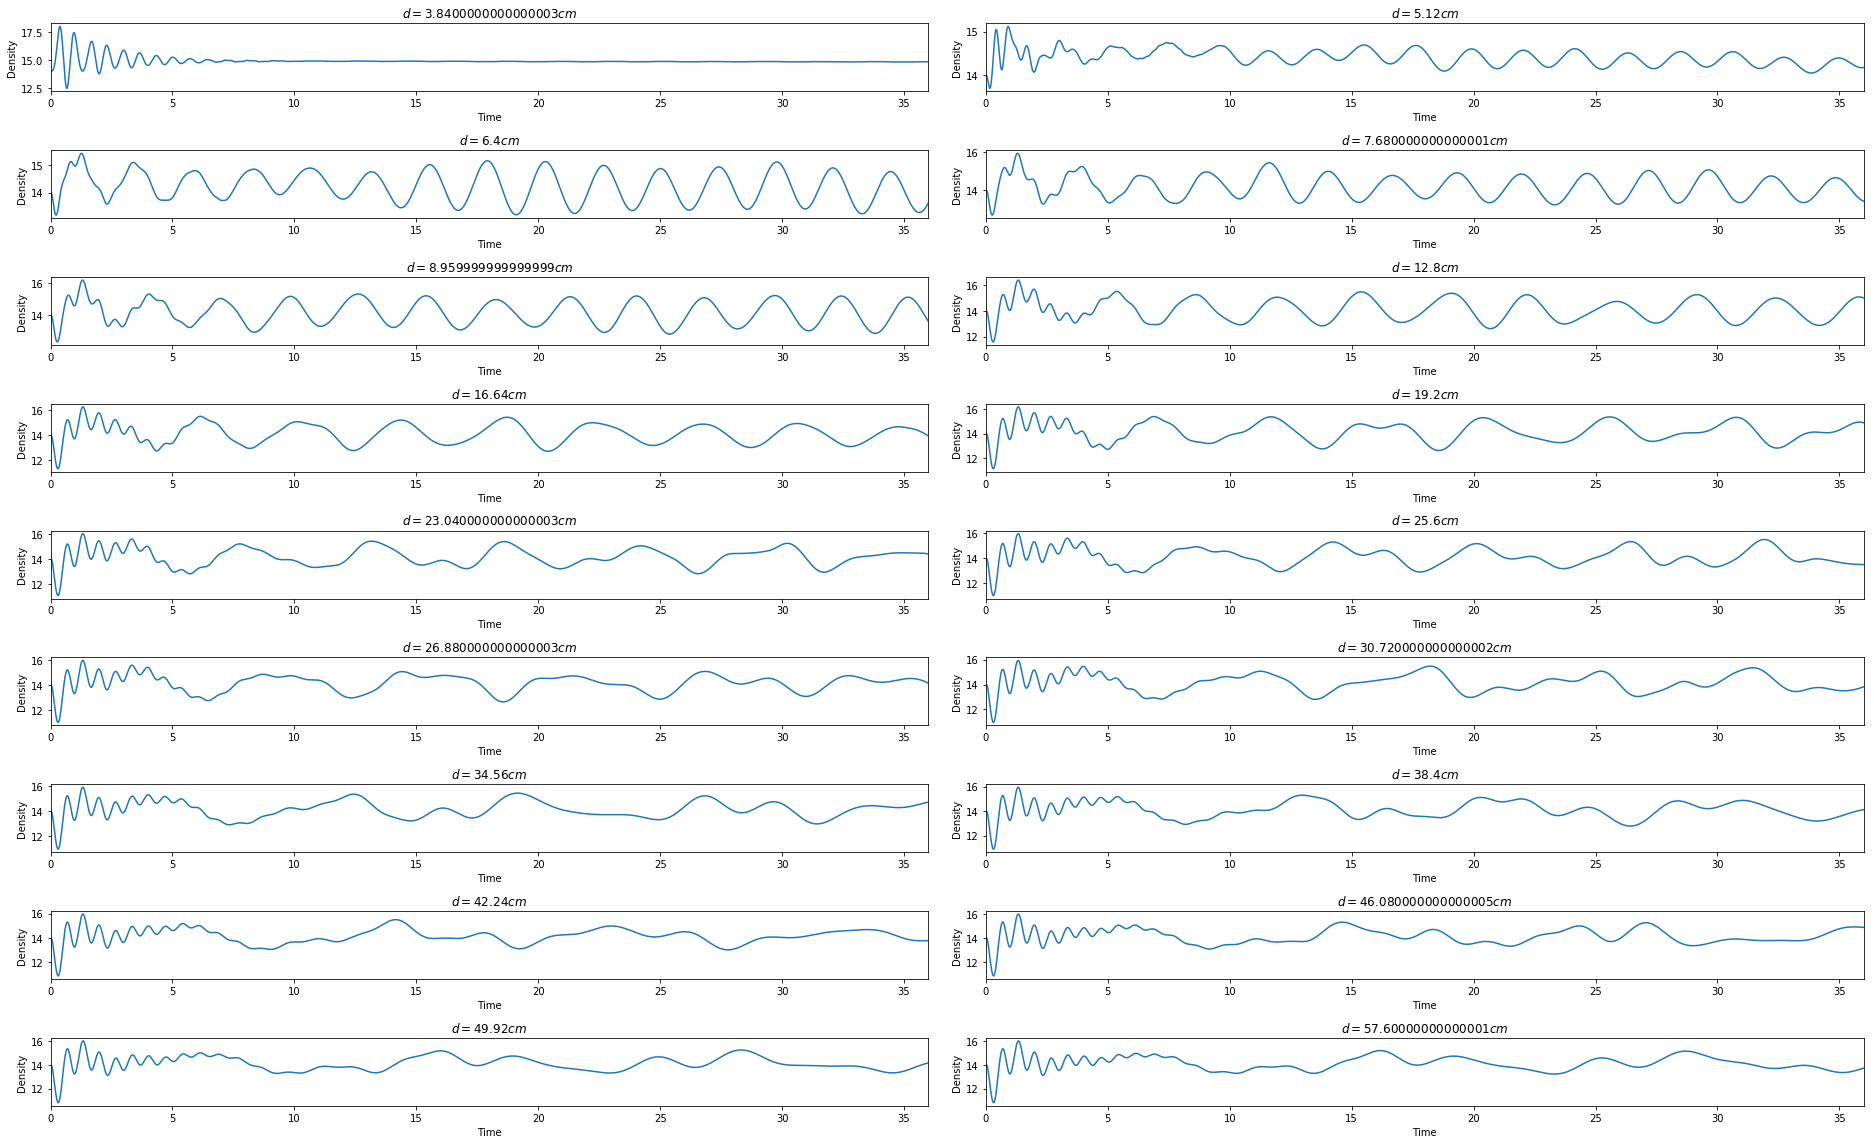

In [17]:
f, axes = plt.subplots(9, 2, figsize=(26,16))
dx = 0.0128 ## meter
sigma = []
for i,ds in enumerate(d):
    ax = axes.flatten()[i]
    asd = np.loadtxt("%s/rho_timeseries.dat" %(ds))
    ax.plot(asd[:,0], asd[:,1])
    ax.set_title('$d=%s cm$' %(ds*dx*100))
    ax.set_xlabel('Time')
    ax.set_ylabel('Density')
    ax.set_xlim(0,36)
    sigma.append(asd[:,1][:3600].std()) 
    
f.tight_layout()
plt.savefig('timeseries.pdf', bbox_inches='tight')
plt.show()

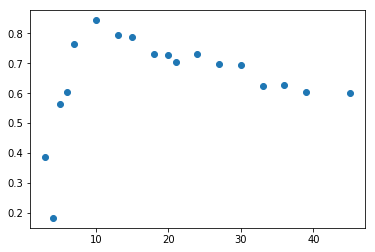

In [14]:
plt.plot(np.array(d), sigma, 'o')

In [74]:
times = np.arange(0, 800., 1.)
rows = []
dictionary = readVariables()

for i in range(120):
    iteration = get_ith_iteration(i, dictionary)
    print(i)
    row = iteration['rho'][14,76:126]
    rows.append(row)

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [10]:
dictionary['rho'].shape
a = get_ith_iteration(0, dictionary)

In [75]:

Z = np.array(rows)

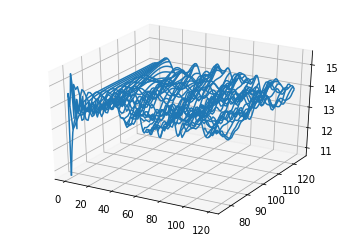

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t = np.arange(120)
x = np.arange(76,126)
T,X = np.meshgrid(t,x)
ax.plot_wireframe(T, X, Z.T,rstride=1000, cstride=2)


In [77]:
sigmas = np.zeros(Z.shape[1])

In [79]:
sigmas = np.std(Z.T, axis = 1)
print(sigmas.shape)

(50,)


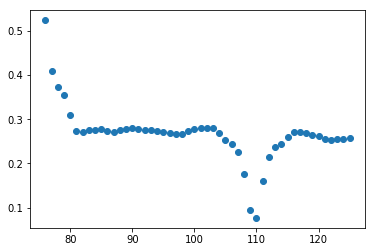

In [80]:
plt.plot(x, sigmas, 'o')

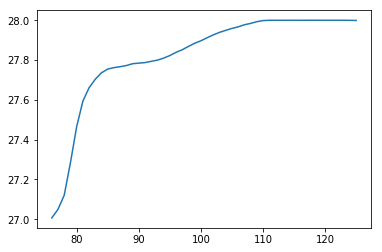

In [47]:
plt.plot(np.arange(76,126,1), Z[10 b][76:126])

## A maximális szórású Z hely kiválasztása

In [69]:
def get_max_sigma(place):
    rows = []
    dictionary = readVariables()

    for i in range(120):
        iteration = get_ith_iteration(i, dictionary)
        row = iteration['rho'][place,76:126]
        rows.append(row)
    Z = np.array(rows)
    sigmas = np.std(Z.T, axis = 1)
    #plt.plot(x, sigmas, 'o')
    pl = np.argmax(sigmas)
    return [pl, sigmas[pl]]

In [73]:
for i in range(26):
    print(i, get_max_sigma(i))

0 [7, 5.042246454265755e-05]
1 [17, 4.240548231721404e-05]
2 [46, 3.904582421833211e-05]
3 [41, 3.426634241091715e-05]
4 [41, 5.0606619434176305e-05]
5 [41, 4.3130518165473286e-05]
6 [11, 6.213322380176329e-05]
7 [10, 5.71417316853452e-05]
8 [13, 4.379934043136059e-05]
9 [1, 6.517578740520813e-05]
10 [12, 5.3679133515734004e-05]
11 [0, 0.0004678537508904064]
12 [34, 0.39148304345202595]
13 [0, 0.45409158911124414]
14 [0, 0.523464652321223]
15 [0, 0.5041435632823899]
16 [34, 0.38957043336624825]
17 [0, 0.0007616802434966225]
18 [17, 0.00010320043066322417]
19 [46, 7.547337830856811e-05]
20 [6, 0.00011097977293279689]
21 [40, 6.743803740298265e-05]
22 [35, 9.601446505689156e-05]
23 [35, 6.474019659862617e-05]
24 [22, 7.328467325046319e-05]
25 [0, 0.0]


## Z = 14dz  mellett time-space plotok

n_out = 0.3/dt 
dt = 0.1

In [83]:
ds = [7, 10, 13, 15, 18,20,21,24, 27, 30, 33, 36, 39]

In [90]:
sigms = []

In [99]:
def draw_spacetime(dist):
    rows = []
    dictionary = readVariables(str(dist))
    for i in range(120):
        iteration = get_ith_iteration(i, dictionary)
        row = iteration['rho'][14,76:76+dist-2]
        rows.append(row)
    Z = np.array(rows)
    sigmas = np.std(Z.T, axis = 1)
    t = np.arange(120)*0.3
    x = np.arange(76,76+dist-2)*0.0128*100
    T,X = np.meshgrid(t,x)
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    
    ax.plot_wireframe(T, X, Z.T,rstride=1000, cstride=2)
    sigmas = np.std(Z.T, axis = 1)
    ax2.plot(x, sigmas, 'o')
    ax3.plot(t, Z.T[0], '-o', markersize=0.5)
    ax.set_xlabel('time [s]')
    ax.set_ylabel('X [cm]')
    ax.set_zlabel('Density [kg/m$^3$]')
    ax.set_title('Distance = %s cm' %(dist*0.0128*100))
    ax2.set_xlabel('X [cm]')
    ax2.set_ylabel('$\sigma$ [kg/m$^3$]')
    
    ax3.set_xlabel('time [s]')
    ax3.set_ylabel('Density [kg/m$^3$]')
    fig.tight_layout()
    plt.savefig('%s/Spacetime_.pdf' %dist, bbox_inches='tight')
    sigms.append(sigmas[0])
    

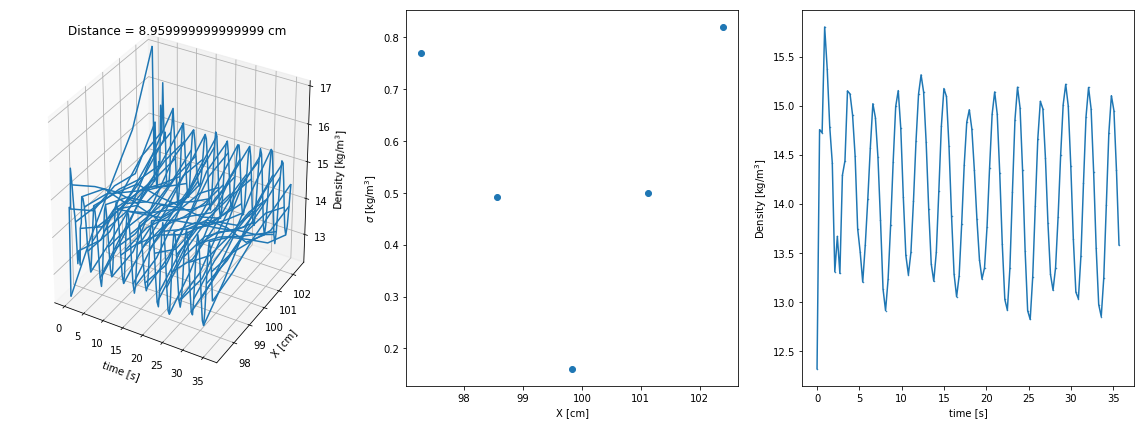

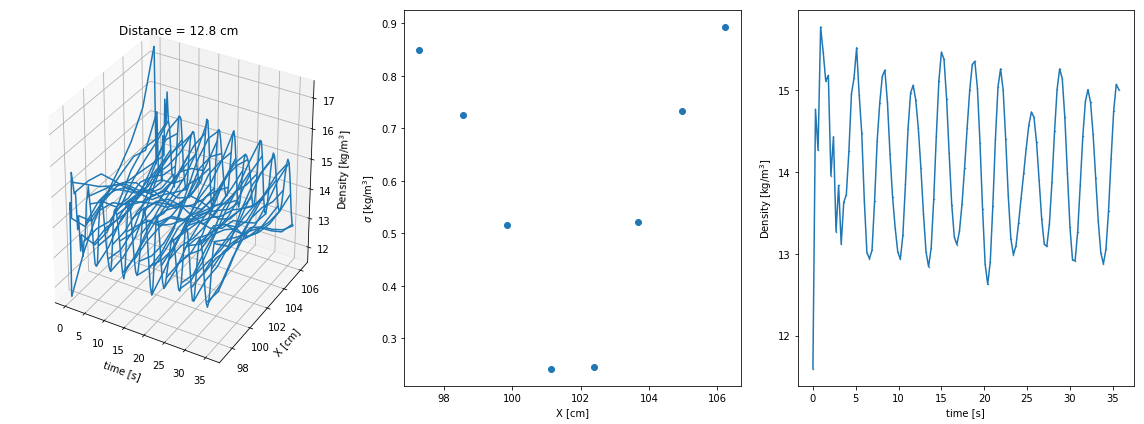

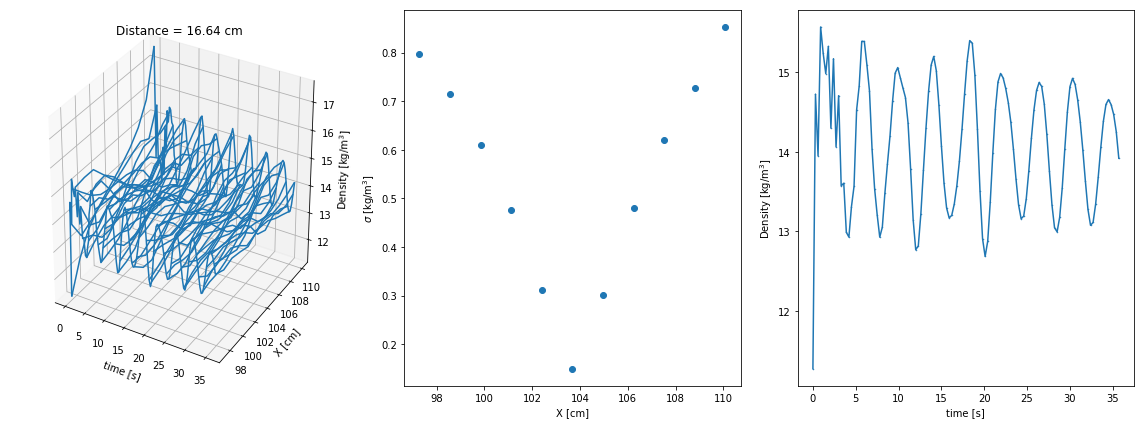

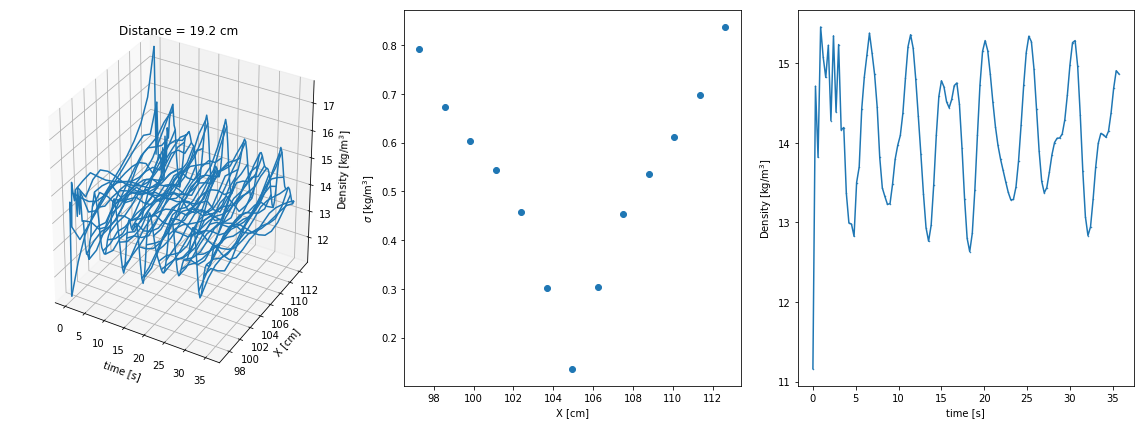

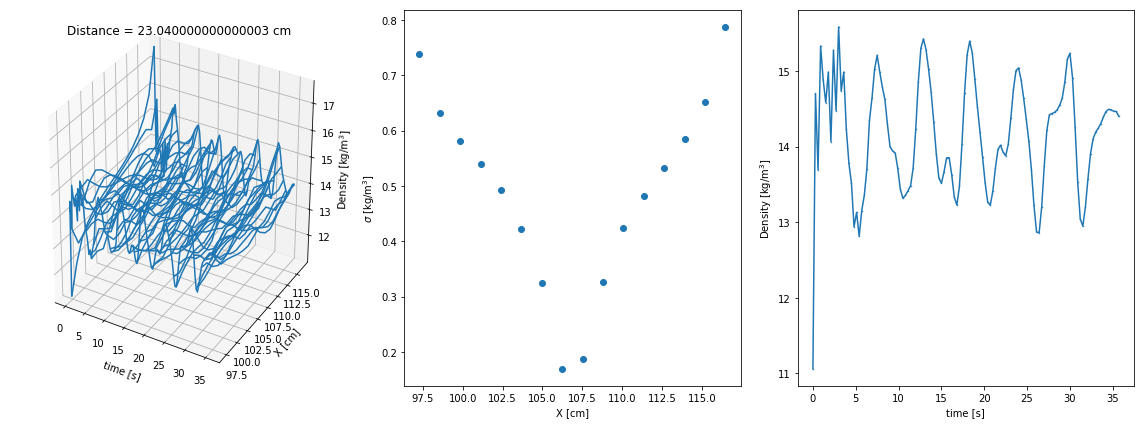

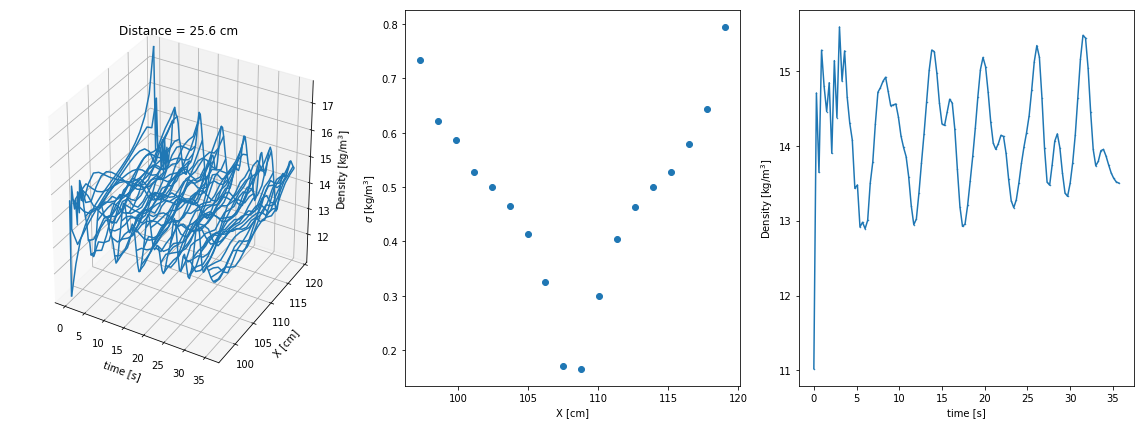

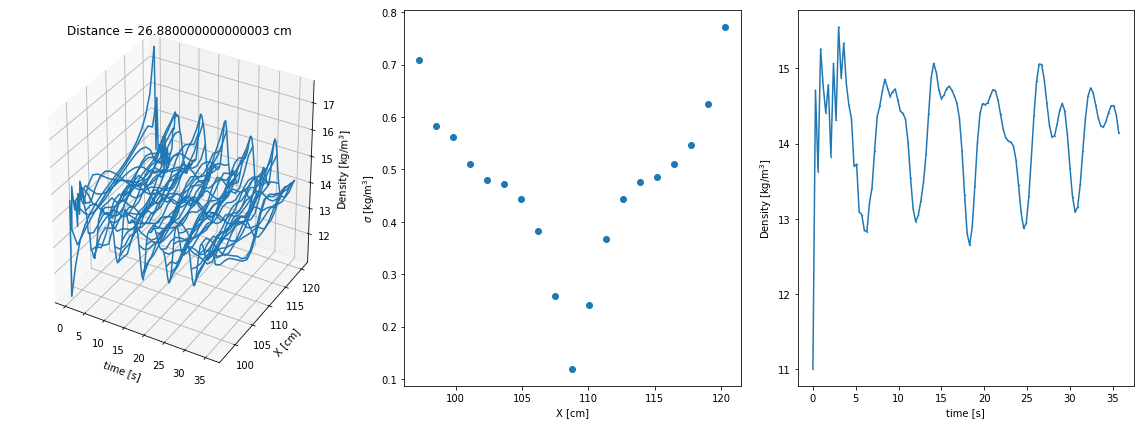

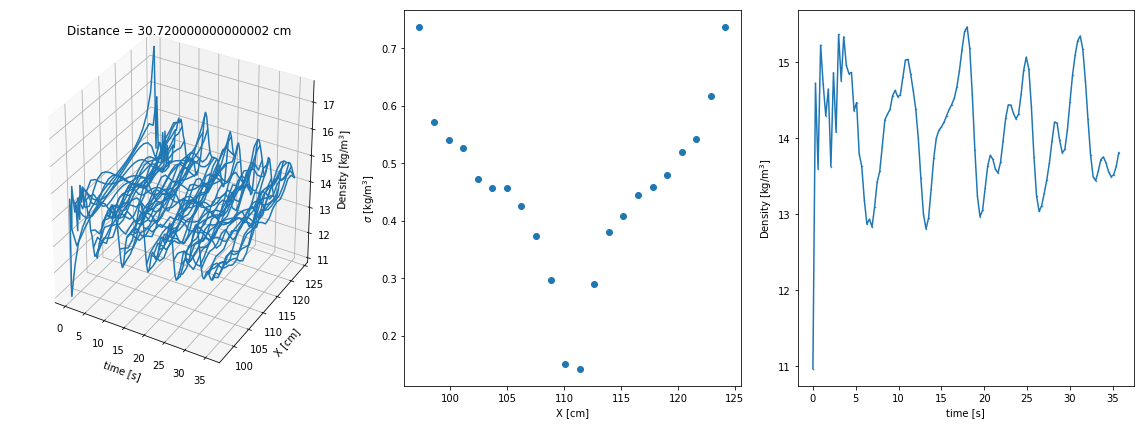

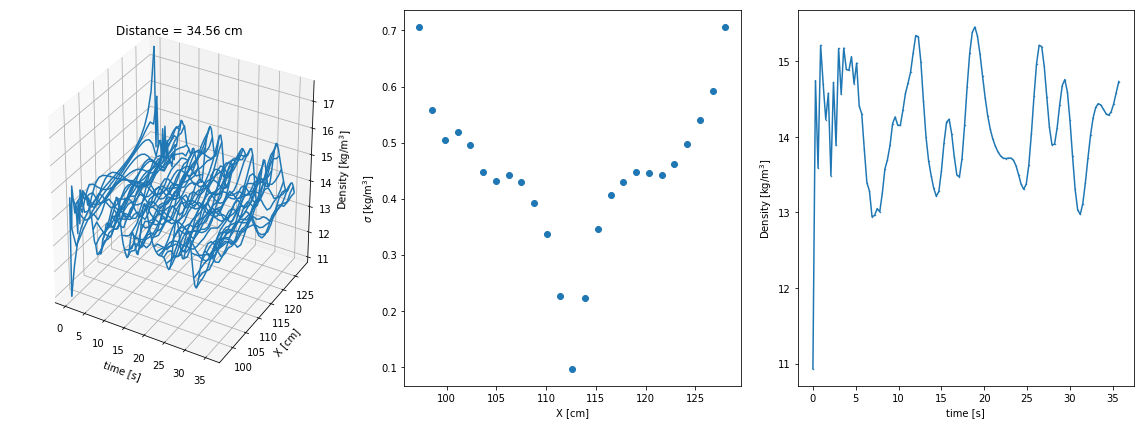

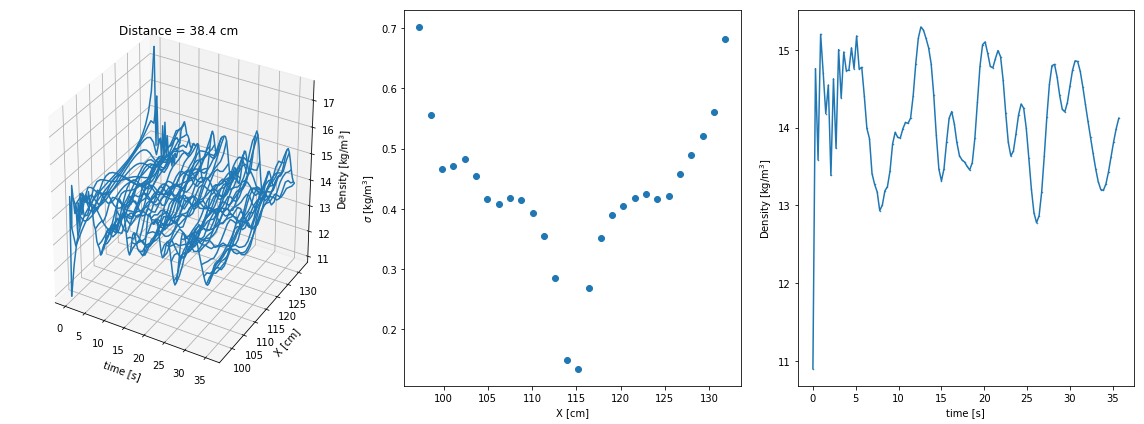

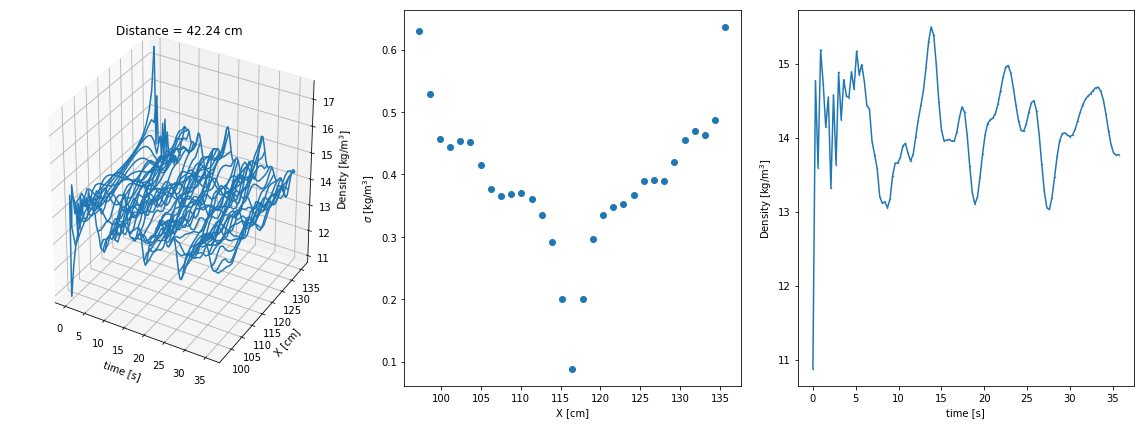

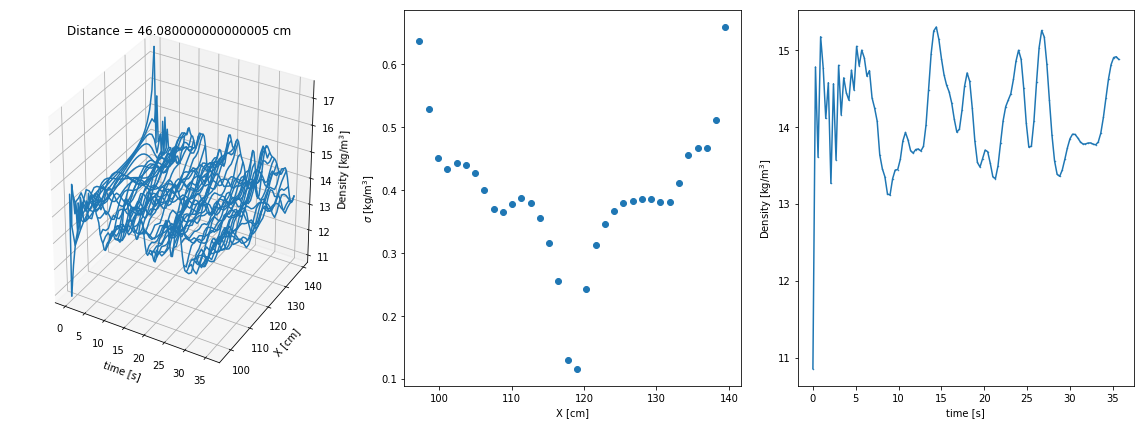

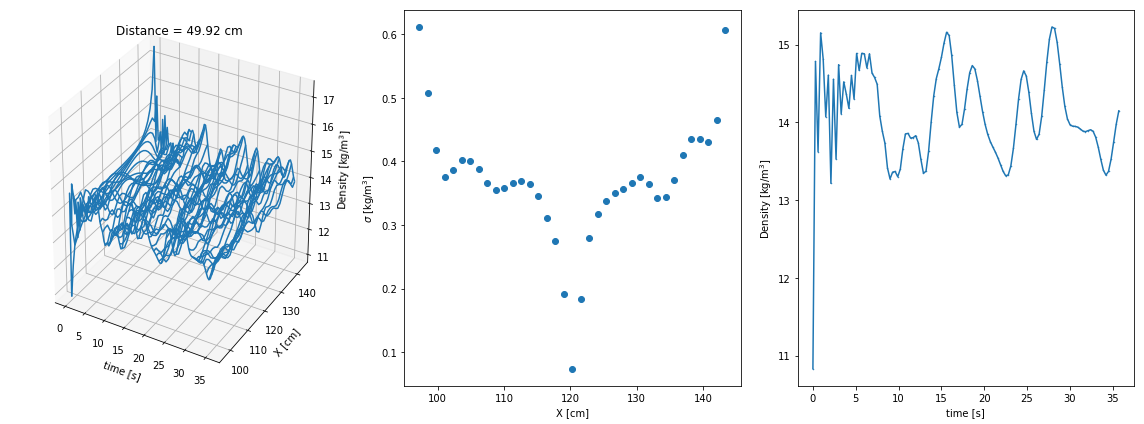

In [100]:
sigms = []
for d in ds:
    draw_spacetime(d)

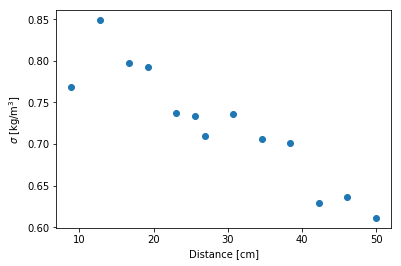

In [107]:
plt.plot(np.array(ds)*0.0128*100, sigms, 'o')
plt.xlabel('Distance [cm]')
plt.ylabel('$\sigma$ [kg/m$^3$]')
plt.savefig('resonance.pdf')

In [104]:
len(ds)

13

### Nov. 24: 

sűrűség rétegzettség-profil, tanh-függvénnyel:

$$
\rho(z) = \rho_0 + \frac{\Delta \rho}{2} \left(1 + tanh\left(\frac{z-h_0}{\Delta h} \right) \right)
$$
rácson ez ($z = i\cdot dz$)

$$
\rho(i\cdot dz) = \rho_0 + \frac{\Delta \rho}{2} \left(1 + tanh\left(\frac{i\cdot dz-H_0\cdot dz}{\Delta H \cdot dz} \right) \right)
$$

$h_0 = 8.6$ cm, $H_0 $= 8.6 cm /0.0064 m = 13.43

$\Delta h$ = 1.3 cm, $\Delta H = 2$

In [4]:
8.6/(0.0064*100)

13.4375

In [5]:
1.3/(0.0064*100)

2.03125

In [35]:
def plotVariables(variables, save=None, every = 5, width = 201, length = 26):
    plt.clf() 
    x = np.linspace(0, 2.25, width)
    y = np.linspace(0, -0.25, length)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,1,1, adjustable='box')

    im = ax1.contourf(X, Y, variables['rho']+1028., alpha=0.5, cmap=cm.viridis)  
    #ax1.quiver(X[::every, ::every], Y[::every, ::every], variables['u'][::every, ::every], variables['w'][::every, ::every])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    fig.colorbar(im, ax=ax1)
    dt = 0.01
    time = i*(0.3/dt)
    ax1.set_title('Density, t = {:d} min'.format(time))
    fig.tight_layout()
    
    if(save):
        plt.savefig(save)
    plt.close()

ValueError: Unknown format code 'd' for object of type 'float'

<Figure size 432x288 with 0 Axes>

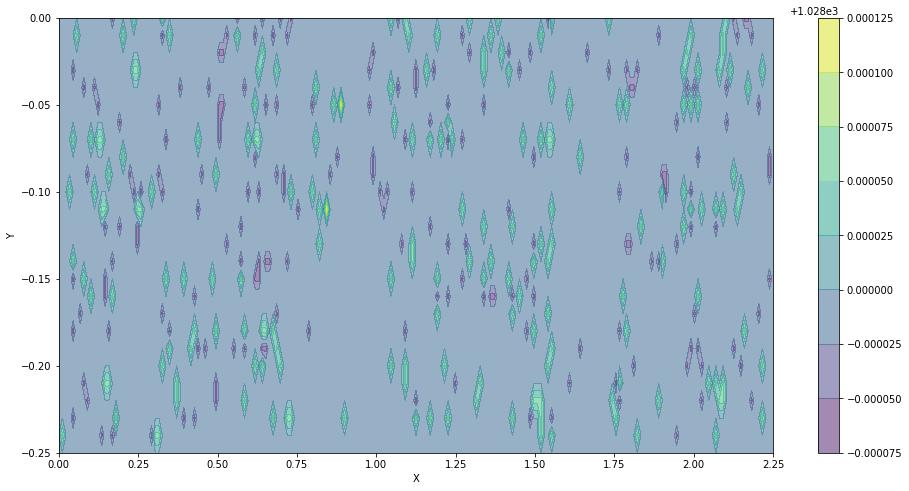

In [36]:
for i in range(120):
    
    iteration = get_ith_iteration(i, dictionary)
    plotVariables(iteration, 'tanh/20/pics/'+'{0:03d}'.format(i)+'.png')


In [37]:
d = np.loadtxt('rho__00.dat')


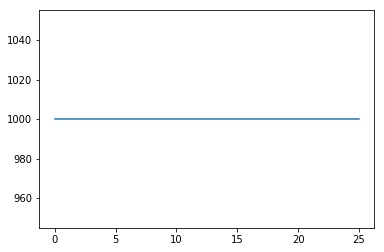

In [38]:
plt.plot(d)

In [ ]:
x